In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas_datareader as data
import yfinance as yf

In [28]:
start_date='2010-01-01'
end_date='2023-05-01'

df=yf.download('AAPL',start=start_date,end=end_date)
df.head()

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-01-04,7.622500,7.660714,7.585000,7.643214,6.487535,493729600
2010-01-05,7.664286,7.699643,7.616071,7.656429,6.498750,601904800
2010-01-06,7.656429,7.686786,7.526786,7.534643,6.395379,552160000
2010-01-07,7.562500,7.571429,7.466071,7.520714,6.383556,477131200
2010-01-08,7.510714,7.571429,7.466429,7.570714,6.425995,447610800


In [29]:
df.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-04-24,165.000000,165.600006,163.889999,165.330002,164.878983,41949600
2023-04-25,165.190002,166.309998,163.729996,163.770004,163.323242,48714100
2023-04-26,163.059998,165.279999,162.800003,163.759995,163.313263,45498800
2023-04-27,165.190002,168.559998,165.190002,168.410004,167.950592,64902300
2023-04-28,168.490005,169.850006,167.880005,169.679993,169.217117,55209200


In [30]:
df=df.reset_index()
df.head()


,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-01-04,7.622500,7.660714,7.585000,7.643214,6.487535,493729600
1,2010-01-05,7.664286,7.699643,7.616071,7.656429,6.498750,601904800
2,2010-01-06,7.656429,7.686786,7.526786,7.534643,6.395379,552160000
3,2010-01-07,7.562500,7.571429,7.466071,7.520714,6.383556,477131200
4,2010-01-08,7.510714,7.571429,7.466429,7.570714,6.425995,447610800


In [31]:
df=df.drop(['Date','Adj Close'],axis=1)
df.head()

,Open,High,Low,Close,Volume
0,7.622500,7.660714,7.585000,7.643214,493729600
1,7.664286,7.699643,7.616071,7.656429,601904800
2,7.656429,7.686786,7.526786,7.534643,552160000
3,7.562500,7.571429,7.466071,7.520714,477131200
4,7.510714,7.571429,7.466429,7.570714,447610800


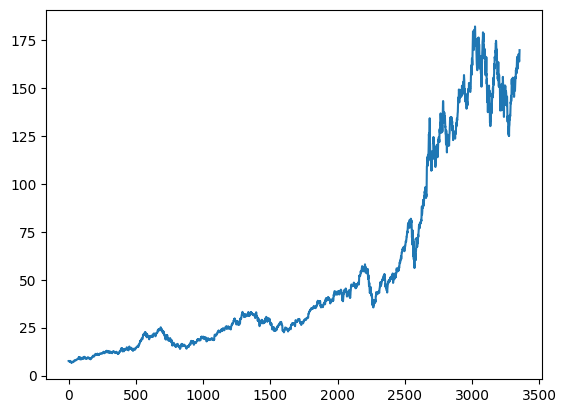

In [32]:
plt.plot(df.Close)

In [33]:
ma100=df.Close.rolling(100).mean()
ma100

0            NaN
1            NaN
2            NaN
3            NaN
4            NaN
          ...   
3348    148.0303
3349    148.2563
3350    148.4136
3351    148.6146
3352    148.8333
Name: Close, Length: 3353, dtype: float64

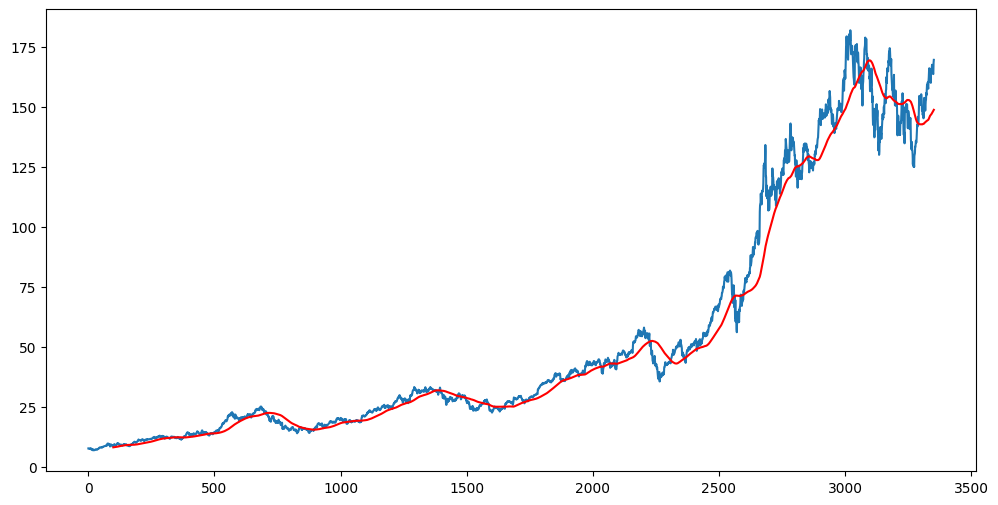

In [34]:
plt.figure(figsize=(12,6))
plt.plot(df.Close)
plt.plot(ma100,'red')

In [35]:
ma200=df.Close.rolling(200).mean()
ma200

0             NaN
1             NaN
2             NaN
3             NaN
4             NaN
          ...    
3348    150.48445
3349    150.56810
3350    150.66255
3351    150.77530
3352    150.89625
Name: Close, Length: 3353, dtype: float64

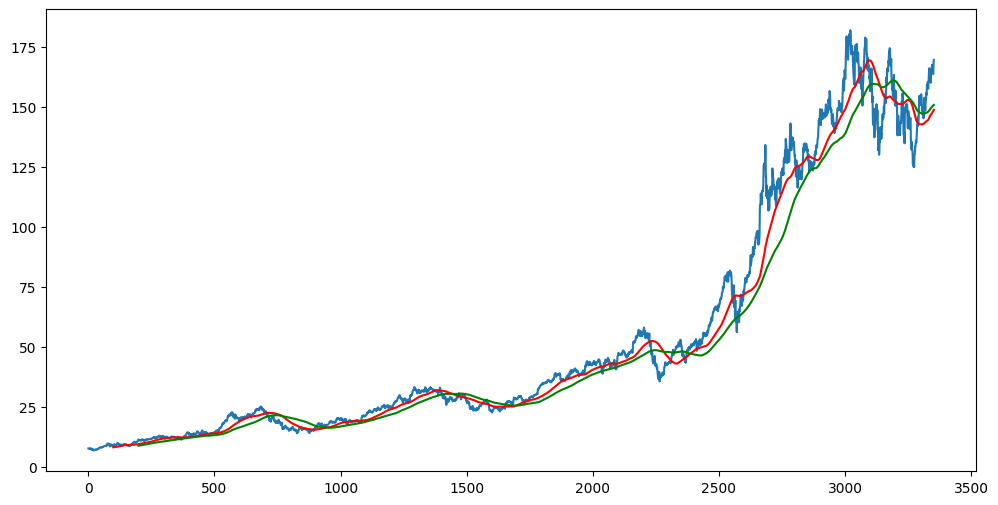

In [36]:
plt.figure(figsize=(12,6))
plt.plot(df.Close)
plt.plot(ma100,'red')
plt.plot(ma200,'green')

In [37]:
df.shape

(3353, 5)

In [38]:
#splitting data into training and testing
data_training=pd.DataFrame(df['Close'][0:int(len(df)*0.70)])
data_testing=pd.DataFrame(df['Close'][int(len(df)*0.70):int(len(df))])

print(data_training.shape)
print(data_testing.shape)

(2347, 1)
(1006, 1)


In [39]:
data_testing.head()

,Close
2347,52.287498
2348,52.937500
2349,52.119999
2350,50.715000
2351,50.724998


In [40]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))

In [41]:
data_training_array=scaler.fit_transform(data_training)
data_training_array

array([[0.01533047],
       [0.01558878],
       [0.01320823],
       ...,
       [0.86580936],
       [0.84655549],
       [0.89469017]])

In [42]:
data_training_array.shape

(2347, 1)

In [43]:
x_train=[]
y_train=[]

for i in range(100,data_training_array.shape[0]):
    x_train.append(data_training_array[i-100:i])
    y_train.append(data_training_array[i,0])
    
x_train,y_train=np.array(x_train),np.array(y_train)

In [24]:
#ML model

In [46]:
from keras.layers import Dense,Dropout,LSTM
from keras.models import Sequential

In [47]:
model=Sequential()
model.add(LSTM(units=50,activation='relu',return_sequences=True,
               input_shape=(x_train.shape[1],1)))
model.add(Dropout(0.2))

model.add(LSTM(units=60,activation='relu',return_sequences=True))
model.add(Dropout(0.3))

model.add(LSTM(units=80,activation='relu',return_sequences=True))
model.add(Dropout(0.4))

model.add(LSTM(units=120,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(units=1))


In [48]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 dropout (Dropout)           (None, 100, 50)           0         
                                                                 
 lstm_1 (LSTM)               (None, 100, 60)           26640     
                                                                 
 dropout_1 (Dropout)         (None, 100, 60)           0         
                                                                 
 lstm_2 (LSTM)               (None, 100, 80)           45120     
                                                                 
 dropout_2 (Dropout)         (None, 100, 80)           0         
                                                                 
 lstm_3 (LSTM)               (None, 120)               9

In [49]:
model.compile(optimizer='adam',loss='mean_squared_error')
model.fit(x_train,y_train,epochs=50)

Epoch 1/50
71/71 [==============================] - 18s 175ms/step - loss: 0.0360
Epoch 2/50
71/71 [==============================] - 13s 187ms/step - loss: 0.0075
Epoch 3/50
71/71 [==============================] - 16s 228ms/step - loss: 0.0071
Epoch 4/50
71/71 [==============================] - 16s 228ms/step - loss: 0.0064
Epoch 5/50
71/71 [==============================] - 17s 235ms/step - loss: 0.0057
Epoch 6/50
71/71 [==============================] - 16s 226ms/step - loss: 0.0056
Epoch 7/50
71/71 [==============================] - 16s 227ms/step - loss: 0.0053
Epoch 8/50
71/71 [==============================] - 16s 228ms/step - loss: 0.0056
Epoch 9/50
71/71 [==============================] - 16s 228ms/step - loss: 0.0048
Epoch 10/50
71/71 [==============================] - 17s 240ms/step - loss: 0.0053
Epoch 11/50
71/71 [==============================] - 16s 232ms/step - loss: 0.0053
Epoch 12/50
71/71 [==============================] - 15s 215ms/step - loss: 0.0049
Epoch 13/50
7

In [50]:
model.save('keras_model.h5')

c:\python39\lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [51]:
data_testing.head()

,Close
2347,52.287498
2348,52.937500
2349,52.119999
2350,50.715000
2351,50.724998


In [52]:
past_100_days=data_training.tail(100)

In [53]:
final_df=past_100_days.append(data_testing,ignore_index=True)

C:\Users\Pradyumn Bagry\AppData\Local\Temp\ipykernel_25200\3595571042.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  final_df=past_100_days.append(data_testing,ignore_index=True)


In [54]:
final_df.head()

,Close
0,43.680000
1,42.122501
2,42.400002
3,42.157501
4,42.275002


In [55]:
input_data=scaler.fit_transform(final_df)
input_data

array([[0.05552616],
       [0.04489204],
       [0.04678673],
       ...,
       [0.87539472],
       [0.90714353],
       [0.91581461]])

In [56]:
input_data.shape

(1106, 1)

In [57]:
x_test=[]
y_test=[]

for i in range(100,input_data.shape[0]):
    x_test.append(input_data[i-100:i])
    y_test.append(input_data[i,0])

In [58]:
x_test,y_test=np.array(x_test),np.array(y_test)
print(x_test.shape)
print(y_test.shape)

(1006, 100, 1)
(1006,)


In [59]:
#making predictions

In [60]:
y_predicted=model.predict(x_test)

32/32 [==============================] - 5s 131ms/step


In [61]:
scaler.scale_

array([0.00682769])

In [62]:
scale_factor=1/0.00682769
y_predicted=y_predicted*scale_factor
y_test=y_test*scale_factor

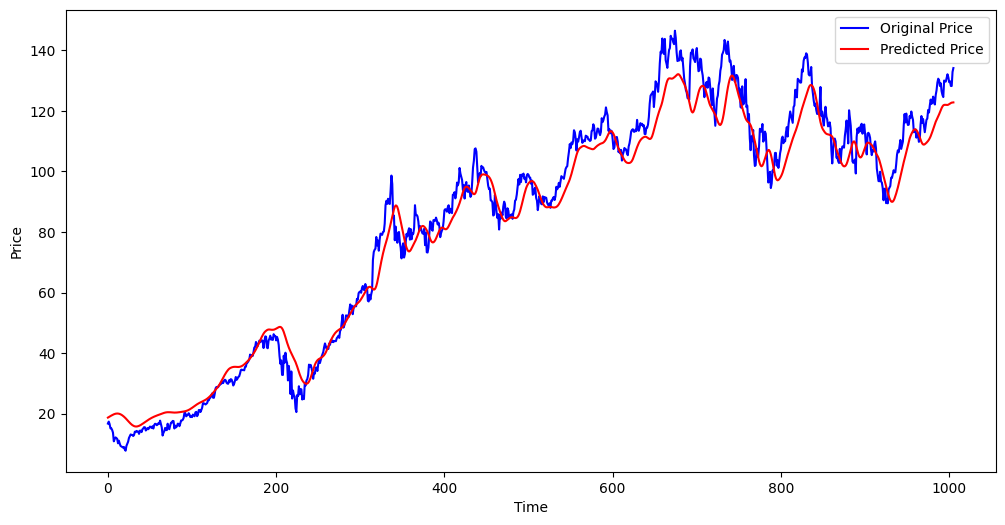

In [63]:
plt.figure(figsize=(12,6))
plt.plot(y_test,'b',label='Original Price')
plt.plot(y_predicted,'r',label='Predicted Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()